In [27]:
from funcs import (
    make_train_test_split_for_lot,
    print_label_distribution,
    compute_cnn_features_for_split,
    fuse_concat,
    fuse_mean,
    fuse_sum,
    fuse_weighted,
    train_models,
    evaluate_models,
    plot_confusion_matrix_for_model,
    compute_texture_features_for_split,
    cross_validate_all
)

# Obtendo samples

In [5]:
base_dir = 'PKLot/PKLot/PKLotSegmented'

In [6]:
ufpr04_train, ufpr04_test, ufpr04_train_days, ufpr04_test_days = make_train_test_split_for_lot(
    base_dir,
    lot_name="UFPR04",
)

In [7]:
pucpr_train, pucpr_test, pucpr_train_days, pucpr_test_days = make_train_test_split_for_lot(
    base_dir,
    lot_name="PUC",
)

In [8]:
print_label_distribution("UFPR04 - treino", ufpr04_train)
print_label_distribution("UFPR04 - teste", ufpr04_test)
print_label_distribution("PUC - treino", pucpr_train)
print_label_distribution("PUC - teste", pucpr_test)


UFPR04 - treino:
  Total: 7000
  Empty   :  3500  (50.00%)
  Occupied:  3500  (50.00%)

UFPR04 - teste:
  Total: 2000
  Empty   :  1000  (50.00%)
  Occupied:  1000  (50.00%)

PUC - treino:
  Total: 7000
  Empty   :  3500  (50.00%)
  Occupied:  3500  (50.00%)

PUC - teste:
  Total: 2000
  Empty   :  1000  (50.00%)
  Occupied:  1000  (50.00%)


In [9]:
# verificando se tem imagens em comum entre treino e teste
train_paths = {s.path for s in ufpr04_train}
test_paths  = {s.path for s in ufpr04_test}
print("UFPR04 paths em comum:", len(train_paths & test_paths))

train_paths = {s.path for s in pucpr_train}
test_paths  = {s.path for s in pucpr_test}
print("PUC paths em comum:", len(train_paths & test_paths))

UFPR04 paths em comum: 0
PUC paths em comum: 0


# Extraindo features

In [10]:
# ufpr04_treino features
ufpr04_train_feats, ufpr04_train_y = compute_cnn_features_for_split(
    ufpr04_train,
    batch_size=64,
    num_workers=4,
)

c:\Users\Pichau\anaconda3\envs\ia_gpu\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Pichau\anaconda3\envs\ia_gpu\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\Pichau\anaconda3\envs\ia_gpu\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weight

Extraindo features com vgg16...
Extraindo features com resnet50...
Extraindo features com mobilenet_v2...


In [11]:
# ufpr04_teste features
ufpr04_test_feats, ufpr04_test_y = compute_cnn_features_for_split(
    ufpr04_test,
    batch_size=64,
    num_workers=4,
)

Extraindo features com vgg16...
Extraindo features com resnet50...
Extraindo features com mobilenet_v2...


In [12]:
# puc_treino features
pucpr_train_feats, pucpr_train_y = compute_cnn_features_for_split(
    pucpr_train,
    batch_size=64,
    num_workers=4,
)

Extraindo features com vgg16...
Extraindo features com resnet50...
Extraindo features com mobilenet_v2...


In [13]:
# puc_teste features
pucpr_test_feats, pucpr_test_y = compute_cnn_features_for_split(
    pucpr_test,
    batch_size=64,
    num_workers=4,
)

Extraindo features com vgg16...
Extraindo features com resnet50...
Extraindo features com mobilenet_v2...


In [14]:
# split com lbp
# ufpr04_treino_lbp features
ufpr04_train_lbp_feats, ufpr04_train_lbp_y = compute_texture_features_for_split(ufpr04_train)
# ufpr04_teste_lbp features
ufpr04_test_lbp_feats, ufpr04_test_lbp_y = compute_texture_features_for_split(ufpr04_test)
# puc_treino_lbp features
pucpr_train_lbp_feats, pucpr_train_lbp_y = compute_texture_features_for_split(pucpr_train)
# puc_teste_lbp features
pucpr_test_lbp_feats, pucpr_test_lbp_y = compute_texture_features_for_split(pucpr_test)

# Realizando fusoes

In [15]:
# concatenacao

# ufpr04
X_train_concat_ufpr04 = fuse_concat(ufpr04_train_feats)
X_test_concat_ufpr04 = fuse_concat(ufpr04_test_feats)
# lbp
X_train_concat_ufpr04_lbp = fuse_concat(ufpr04_train_lbp_feats)
X_test_concat_ufpr04_lbp = fuse_concat(ufpr04_test_lbp_feats)

# pucpr
X_train_concat_pucpr = fuse_concat(pucpr_train_feats)
X_test_concat_pucpr = fuse_concat(pucpr_test_feats)
# lbp
X_train_concat_pucpr_lbp = fuse_concat(pucpr_train_lbp_feats)
X_test_concat_pucpr_lbp = fuse_concat(pucpr_test_lbp_feats)

print('X_train_concat_ufpr04 shape:', X_train_concat_ufpr04.shape)
print('X_test_concat_ufpr04 shape:', X_test_concat_ufpr04.shape)
print('X_train_concat_pucpr shape:', X_train_concat_pucpr.shape)
print('X_test_concat_pucpr shape:', X_test_concat_pucpr.shape)
print('X_train_concat_ufpr04_lbp shape:', X_train_concat_ufpr04_lbp.shape)
print('X_test_concat_ufpr04_lbp shape:', X_test_concat_ufpr04_lbp.shape)
print('X_train_concat_pucpr_lbp shape:', X_train_concat_pucpr_lbp.shape)
print('X_test_concat_pucpr_lbp shape:', X_test_concat_pucpr_lbp.shape)

X_train_concat_ufpr04 shape: (7000, 7424)
X_test_concat_ufpr04 shape: (2000, 7424)
X_train_concat_pucpr shape: (7000, 7424)
X_test_concat_pucpr shape: (2000, 7424)
X_train_concat_ufpr04_lbp shape: (7000, 59)
X_test_concat_ufpr04_lbp shape: (2000, 59)
X_train_concat_pucpr_lbp shape: (7000, 59)
X_test_concat_pucpr_lbp shape: (2000, 59)


In [16]:
# media
# ufpr04
X_train_mean_ufpr04 = fuse_mean(ufpr04_train_feats)
X_test_mean_ufpr04 = fuse_mean(ufpr04_test_feats)
# lbp
X_train_mean_ufpr04_lbp = fuse_mean(ufpr04_train_lbp_feats)
X_test_mean_ufpr04_lbp = fuse_mean(ufpr04_test_lbp_feats)

# pucpr
X_train_mean_pucpr = fuse_mean(pucpr_train_feats)
X_test_mean_pucpr = fuse_mean(pucpr_test_feats)
# lbp
X_train_mean_pucpr_lbp = fuse_mean(pucpr_train_lbp_feats)
X_test_mean_pucpr_lbp = fuse_mean(pucpr_test_lbp_feats)

print('X_train_mean_ufpr04 shape:', X_train_mean_ufpr04.shape)
print('X_test_mean_ufpr04 shape:', X_test_mean_ufpr04.shape)
print('X_train_mean_pucpr shape:', X_train_mean_pucpr.shape)
print('X_test_mean_pucpr shape:', X_test_mean_pucpr.shape)
print('X_train_mean_ufpr04_lbp shape:', X_train_mean_ufpr04_lbp.shape)
print('X_test_mean_ufpr04_lbp shape:', X_test_mean_ufpr04_lbp.shape)
print('X_train_mean_pucpr_lbp shape:', X_train_mean_pucpr_lbp.shape)
print('X_test_mean_pucpr_lbp shape:', X_test_mean_pucpr_lbp.shape)

X_train_mean_ufpr04 shape: (7000, 1280)
X_test_mean_ufpr04 shape: (2000, 1280)
X_train_mean_pucpr shape: (7000, 1280)
X_test_mean_pucpr shape: (2000, 1280)
X_train_mean_ufpr04_lbp shape: (7000, 59)
X_test_mean_ufpr04_lbp shape: (2000, 59)
X_train_mean_pucpr_lbp shape: (7000, 59)
X_test_mean_pucpr_lbp shape: (2000, 59)


In [17]:
# soma
# ufpr04    
X_train_sum_ufpr04 = fuse_sum(ufpr04_train_feats)
X_test_sum_ufpr04 = fuse_sum(ufpr04_test_feats)
# lbp
X_train_sum_ufpr04_lbp = fuse_sum(ufpr04_train_lbp_feats)
X_test_sum_ufpr04_lbp = fuse_sum(ufpr04_test_lbp_feats)

# pucpr
X_train_sum_pucpr = fuse_sum(pucpr_train_feats)
X_test_sum_pucpr = fuse_sum(pucpr_test_feats)
# lbp
X_train_sum_pucpr_lbp = fuse_sum(pucpr_train_lbp_feats)
X_test_sum_pucpr_lbp = fuse_sum(pucpr_test_lbp_feats)

print('X_train_sum_ufpr04 shape:', X_train_sum_ufpr04.shape)
print('X_test_sum_ufpr04 shape:', X_test_sum_ufpr04.shape)
print('X_train_sum_pucpr shape:', X_train_sum_pucpr.shape)
print('X_test_sum_pucpr shape:', X_test_sum_pucpr.shape)
print('X_train_sum_ufpr04_lbp shape:', X_train_sum_ufpr04_lbp.shape)
print('X_test_sum_ufpr04_lbp shape:', X_test_sum_ufpr04_lbp.shape)
print('X_train_sum_pucpr_lbp shape:', X_train_sum_pucpr_lbp.shape)
print('X_test_sum_pucpr_lbp shape:', X_test_sum_pucpr_lbp.shape)

X_train_sum_ufpr04 shape: (7000, 1280)
X_test_sum_ufpr04 shape: (2000, 1280)
X_train_sum_pucpr shape: (7000, 1280)
X_test_sum_pucpr shape: (2000, 1280)
X_train_sum_ufpr04_lbp shape: (7000, 59)
X_test_sum_ufpr04_lbp shape: (2000, 59)
X_train_sum_pucpr_lbp shape: (7000, 59)
X_test_sum_pucpr_lbp shape: (2000, 59)


In [18]:
# ponderada
weights = {"vgg16": 0.5, "resnet50": 0.3, "mobilenet_v2": 0.2}
weights_lbp = {"lbp": 1.0}

# ufpr04
X_train_weighted_ufpr04 = fuse_weighted(ufpr04_train_feats, weights)
X_test_weighted_ufpr04 = fuse_weighted(ufpr04_test_feats, weights)
# lbp
X_train_weighted_ufpr04_lbp = fuse_weighted(ufpr04_train_lbp_feats, weights_lbp)
X_test_weighted_ufpr04_lbp = fuse_weighted(ufpr04_test_lbp_feats, weights_lbp)

# pucpr
X_train_weighted_pucpr = fuse_weighted(pucpr_train_feats, weights)
X_test_weighted_pucpr = fuse_weighted(pucpr_test_feats, weights)
# lbp
X_train_weighted_pucpr_lbp = fuse_weighted(pucpr_train_lbp_feats, weights_lbp)
X_test_weighted_pucpr_lbp = fuse_weighted(pucpr_test_lbp_feats, weights_lbp)

print('X_train_weighted_ufpr04 shape:', X_train_weighted_ufpr04.shape)
print('X_test_weighted_ufpr04 shape:', X_test_weighted_ufpr04.shape)
print('X_train_weighted_pucpr shape:', X_train_weighted_pucpr.shape)
print('X_test_weighted_pucpr shape:', X_test_weighted_pucpr.shape)
print('X_train_weighted_ufpr04_lbp shape:', X_train_weighted_ufpr04_lbp.shape)
print('X_test_weighted_ufpr04_lbp shape:', X_test_weighted_ufpr04_lbp.shape)
print('X_train_weighted_pucpr_lbp shape:', X_train_weighted_pucpr_lbp.shape)
print('X_test_weighted_pucpr_lbp shape:', X_test_weighted_pucpr_lbp.shape)

X_train_weighted_ufpr04 shape: (7000, 1280)
X_test_weighted_ufpr04 shape: (2000, 1280)
X_train_weighted_pucpr shape: (7000, 1280)
X_test_weighted_pucpr shape: (2000, 1280)
X_train_weighted_ufpr04_lbp shape: (7000, 59)
X_test_weighted_ufpr04_lbp shape: (2000, 59)
X_train_weighted_pucpr_lbp shape: (7000, 59)
X_test_weighted_pucpr_lbp shape: (2000, 59)


In [19]:
datasets_fusions = {
    "UFPR04": {
        "concat": (X_train_concat_ufpr04, X_test_concat_ufpr04, ufpr04_train_y, ufpr04_test_y),
        "mean": (X_train_mean_ufpr04, X_test_mean_ufpr04, ufpr04_train_y, ufpr04_test_y),
        "sum": (X_train_sum_ufpr04, X_test_sum_ufpr04, ufpr04_train_y, ufpr04_test_y),
        "weighted": (X_train_weighted_ufpr04, X_test_weighted_ufpr04, ufpr04_train_y, ufpr04_test_y),
        'concat_lbp': (X_train_concat_ufpr04_lbp, X_test_concat_ufpr04_lbp, ufpr04_train_lbp_y, ufpr04_test_lbp_y),
        'mean_lbp': (X_train_mean_ufpr04_lbp, X_test_mean_ufpr04_lbp, ufpr04_train_lbp_y, ufpr04_test_lbp_y),
        'sum_lbp': (X_train_sum_ufpr04_lbp, X_test_sum_ufpr04_lbp, ufpr04_train_lbp_y, ufpr04_test_lbp_y),
        'weighted_lbp': (X_train_weighted_ufpr04_lbp, X_test_weighted_ufpr04_lbp, ufpr04_train_lbp_y, ufpr04_test_lbp_y),
    },
    "PUC": {
        "concat": (X_train_concat_pucpr, X_test_concat_pucpr, pucpr_train_y, pucpr_test_y),
        "mean": (X_train_mean_pucpr, X_test_mean_pucpr, pucpr_train_y, pucpr_test_y),
        "sum": (X_train_sum_pucpr, X_test_sum_pucpr, pucpr_train_y, pucpr_test_y),
        "weighted": (X_train_weighted_pucpr, X_test_weighted_pucpr, pucpr_train_y, pucpr_test_y),
        'concat_lbp': (X_train_concat_pucpr_lbp, X_test_concat_pucpr_lbp, pucpr_train_lbp_y, pucpr_test_lbp_y),
        'mean_lbp': (X_train_mean_pucpr_lbp, X_test_mean_pucpr_lbp, pucpr_train_lbp_y, pucpr_test_lbp_y),
        'sum_lbp': (X_train_sum_pucpr_lbp, X_test_sum_pucpr_lbp, pucpr_train_lbp_y, pucpr_test_lbp_y),
        'weighted_lbp': (X_train_weighted_pucpr_lbp, X_test_weighted_pucpr_lbp, pucpr_train_lbp_y, pucpr_test_lbp_y),
    },
}

# Treimaneto dos modelos

In [20]:
models_dict = train_models(datasets_fusions)


Dataset: UFPR04
Treinando modelos para fusão: concat | shape: (7000, 7424)
SVM treinado (UFPR04, concat)
MLP treinado (UFPR04, concat)
Treinando modelos para fusão: mean | shape: (7000, 1280)
SVM treinado (UFPR04, mean)
MLP treinado (UFPR04, mean)
Treinando modelos para fusão: sum | shape: (7000, 1280)
SVM treinado (UFPR04, sum)
MLP treinado (UFPR04, sum)
Treinando modelos para fusão: weighted | shape: (7000, 1280)
SVM treinado (UFPR04, weighted)
MLP treinado (UFPR04, weighted)
Treinando modelos para fusão: concat_lbp | shape: (7000, 59)
SVM treinado (UFPR04, concat_lbp)


c:\Users\Pichau\anaconda3\envs\ia_gpu\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP treinado (UFPR04, concat_lbp)
Treinando modelos para fusão: mean_lbp | shape: (7000, 59)
SVM treinado (UFPR04, mean_lbp)


c:\Users\Pichau\anaconda3\envs\ia_gpu\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP treinado (UFPR04, mean_lbp)
Treinando modelos para fusão: sum_lbp | shape: (7000, 59)
SVM treinado (UFPR04, sum_lbp)


c:\Users\Pichau\anaconda3\envs\ia_gpu\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP treinado (UFPR04, sum_lbp)
Treinando modelos para fusão: weighted_lbp | shape: (7000, 59)
SVM treinado (UFPR04, weighted_lbp)


c:\Users\Pichau\anaconda3\envs\ia_gpu\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP treinado (UFPR04, weighted_lbp)

Dataset: PUC
Treinando modelos para fusão: concat | shape: (7000, 7424)
SVM treinado (PUC, concat)
MLP treinado (PUC, concat)
Treinando modelos para fusão: mean | shape: (7000, 1280)
SVM treinado (PUC, mean)
MLP treinado (PUC, mean)
Treinando modelos para fusão: sum | shape: (7000, 1280)
SVM treinado (PUC, sum)
MLP treinado (PUC, sum)
Treinando modelos para fusão: weighted | shape: (7000, 1280)
SVM treinado (PUC, weighted)
MLP treinado (PUC, weighted)
Treinando modelos para fusão: concat_lbp | shape: (7000, 59)
SVM treinado (PUC, concat_lbp)


c:\Users\Pichau\anaconda3\envs\ia_gpu\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP treinado (PUC, concat_lbp)
Treinando modelos para fusão: mean_lbp | shape: (7000, 59)
SVM treinado (PUC, mean_lbp)


c:\Users\Pichau\anaconda3\envs\ia_gpu\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP treinado (PUC, mean_lbp)
Treinando modelos para fusão: sum_lbp | shape: (7000, 59)
SVM treinado (PUC, sum_lbp)


c:\Users\Pichau\anaconda3\envs\ia_gpu\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP treinado (PUC, sum_lbp)
Treinando modelos para fusão: weighted_lbp | shape: (7000, 59)
SVM treinado (PUC, weighted_lbp)
MLP treinado (PUC, weighted_lbp)

Treinamento concluído.
Total de modelos treinados: 32


c:\Users\Pichau\anaconda3\envs\ia_gpu\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


# Avaliando modelos - intra e cros

In [21]:
# tabela com f1 para cada combinação
df_results = evaluate_models(models_dict, datasets_fusions, average_key="weighted avg")
df_results

,train_dataset,eval_dataset,algo,fusion,f1_weighted_avg,f1_macro,f1_weighted
0,UFPR04,UFPR04,SVM,concat,0.997500,0.997500,0.997500
1,UFPR04,PUC,SVM,concat,0.971978,0.971978,0.971978
2,UFPR04,UFPR04,MLP,concat,0.997500,0.997500,0.997500
3,UFPR04,PUC,MLP,concat,0.992000,0.992000,0.992000
4,UFPR04,UFPR04,SVM,mean,0.998000,0.998000,0.998000
...,...,...,...,...,...,...,...
59,PUC,PUC,MLP,sum_lbp,0.934333,0.934333,0.934333
60,PUC,UFPR04,SVM,weighted_lbp,0.705353,0.705353,0.705353
61,PUC,PUC,SVM,weighted_lbp,0.925208,0.925208,0.925208
62,PUC,UFPR04,MLP,weighted_lbp,0.747327,0.747327,0.747327


In [22]:
# resultados ordenados
df_results.sort_values(by="f1_weighted_avg", ascending=False)

,train_dataset,eval_dataset,algo,fusion,f1_weighted_avg,f1_macro,f1_weighted
43,PUC,PUC,MLP,sum,0.999500,0.999500,0.999500
35,PUC,PUC,MLP,concat,0.999500,0.999500,0.999500
47,PUC,PUC,MLP,weighted,0.999500,0.999500,0.999500
37,PUC,PUC,SVM,mean,0.999500,0.999500,0.999500
45,PUC,PUC,SVM,weighted,0.999500,0.999500,0.999500
...,...,...,...,...,...,...,...
62,PUC,UFPR04,MLP,weighted_lbp,0.747327,0.747327,0.747327
56,PUC,UFPR04,SVM,sum_lbp,0.705353,0.705353,0.705353
48,PUC,UFPR04,SVM,concat_lbp,0.705353,0.705353,0.705353
60,PUC,UFPR04,SVM,weighted_lbp,0.705353,0.705353,0.705353


In [23]:
df_results.query("train_dataset == 'UFPR04'")

,train_dataset,eval_dataset,algo,fusion,f1_weighted_avg,f1_macro,f1_weighted
0,UFPR04,UFPR04,SVM,concat,0.997500,0.997500,0.997500
1,UFPR04,PUC,SVM,concat,0.971978,0.971978,0.971978
2,UFPR04,UFPR04,MLP,concat,0.997500,0.997500,0.997500
3,UFPR04,PUC,MLP,concat,0.992000,0.992000,0.992000
4,UFPR04,UFPR04,SVM,mean,0.998000,0.998000,0.998000
5,UFPR04,PUC,SVM,mean,0.983496,0.983496,0.983496
6,UFPR04,UFPR04,MLP,mean,0.997000,0.997000,0.997000
7,UFPR04,PUC,MLP,mean,0.994500,0.994500,0.994500
8,UFPR04,UFPR04,SVM,sum,0.998000,0.998000,0.998000
9,UFPR04,PUC,SVM,sum,0.983496,0.983496,0.983496


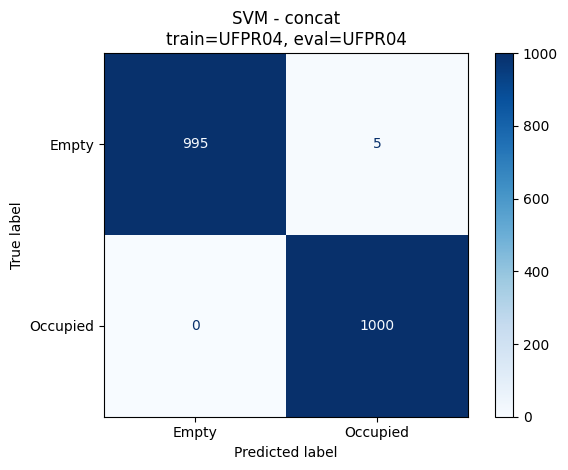

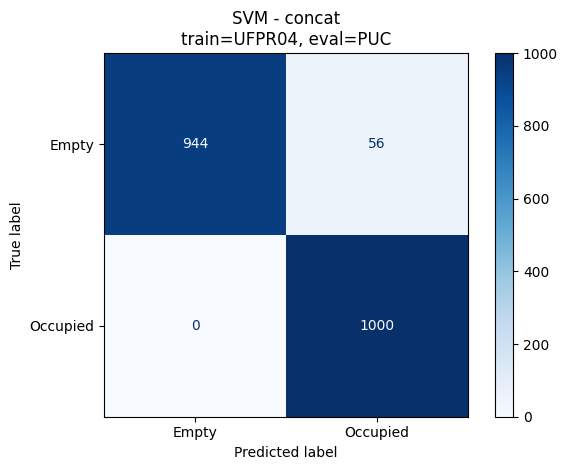

In [24]:
plot_confusion_matrix_for_model(
    models_dict,
    datasets_fusions,
    train_dataset="UFPR04",
    eval_dataset="UFPR04",
    fusion_name="concat",
    algo="SVM"
)

plot_confusion_matrix_for_model(
    models_dict,
    datasets_fusions,
    train_dataset="UFPR04",
    eval_dataset="PUC",
    fusion_name="concat",
    algo="SVM"
)

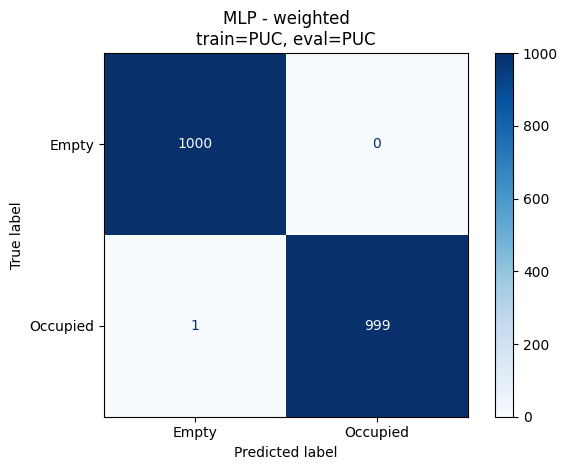

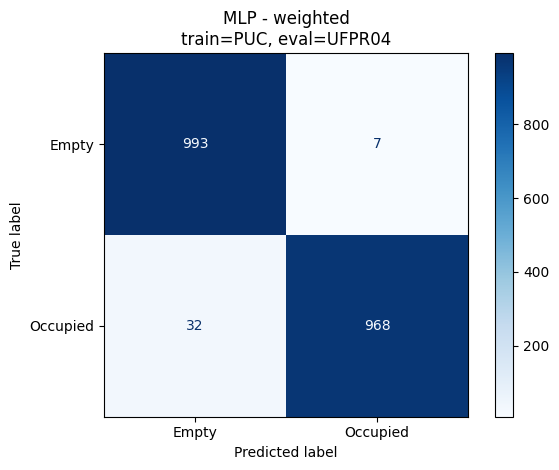

In [25]:
plot_confusion_matrix_for_model(
    models_dict,
    datasets_fusions,
    train_dataset="PUC",
    eval_dataset="PUC",
    fusion_name="weighted",
    algo="MLP"
)

plot_confusion_matrix_for_model(
    models_dict,
    datasets_fusions,
    train_dataset="PUC",
    eval_dataset="UFPR04",
    fusion_name="weighted",
    algo="MLP"
)

In [28]:
df_cv_results = cross_validate_all(datasets_fusions, random_state=42, cv_splits=5)
df_cv_results

[CV] UFPR04 | concat | SVM -> F1=0.9994 ± 0.0008
[CV] UFPR04 | concat | MLP -> F1=0.9987 ± 0.0008
[CV] UFPR04 | mean | SVM -> F1=0.9993 ± 0.0006
[CV] UFPR04 | mean | MLP -> F1=0.9990 ± 0.0010
[CV] UFPR04 | sum | SVM -> F1=0.9993 ± 0.0006
[CV] UFPR04 | sum | MLP -> F1=0.9990 ± 0.0010
[CV] UFPR04 | weighted | SVM -> F1=0.9991 ± 0.0008
[CV] UFPR04 | weighted | MLP -> F1=0.9990 ± 0.0007
[CV] UFPR04 | concat_lbp | SVM -> F1=0.8465 ± 0.0038
[CV] UFPR04 | concat_lbp | MLP -> F1=0.8394 ± 0.0052
[CV] UFPR04 | mean_lbp | SVM -> F1=0.8465 ± 0.0038
[CV] UFPR04 | mean_lbp | MLP -> F1=0.8394 ± 0.0052
[CV] UFPR04 | sum_lbp | SVM -> F1=0.8465 ± 0.0038
[CV] UFPR04 | sum_lbp | MLP -> F1=0.8394 ± 0.0052
[CV] UFPR04 | weighted_lbp | SVM -> F1=0.8465 ± 0.0038
[CV] UFPR04 | weighted_lbp | MLP -> F1=0.8394 ± 0.0052
[CV] PUC | concat | SVM -> F1=0.9987 ± 0.0012
[CV] PUC | concat | MLP -> F1=0.9981 ± 0.0014
[CV] PUC | mean | SVM -> F1=0.9989 ± 0.0010
[CV] PUC | mean | MLP -> F1=0.9987 ± 0.0008
[CV] PUC | sum |

,dataset,fusion,algo,cv_splits,f1_cv_mean,f1_cv_std
0,UFPR04,concat,SVM,5,0.999429,0.000833
1,UFPR04,concat,MLP,5,0.998714,0.000833
2,UFPR04,mean,SVM,5,0.999286,0.000639
3,UFPR04,mean,MLP,5,0.999000,0.000969
4,UFPR04,sum,SVM,5,0.999286,0.000639
5,UFPR04,sum,MLP,5,0.999000,0.000969
6,UFPR04,weighted,SVM,5,0.999143,0.000833
7,UFPR04,weighted,MLP,5,0.999000,0.000728
8,UFPR04,concat_lbp,SVM,5,0.846532,0.003849
9,UFPR04,concat_lbp,MLP,5,0.839383,0.005178
